---
**Autor**: Prof. Dino Magri

**Contato**: `professor.dinomagri@gmail.com`

**Licença deste notebook**: 
<br>
<img align="left" width="80" src="https://licensebuttons.net/l/by/3.0/88x31.png" />

<br>
<br>

[Clique aqui para saber mais sobre a licença CC BY v4.0](https://creativecommons.org/licenses/by/4.0/legalcode.pt)


---

## Parte 1 - Análise Exploratória de Dados - Exercícios

---
#### NOTA MÁXIMA: 25 pontos

#### NOME COMPLETO: `...`
--- 
<img align="center" width="150" src="https://logodownload.org/wp-content/uploads/2017/05/ifood-logo-0.png">



### Acessando as bases

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

### Segementação de clientes - `customer_segmentation`

In [3]:
df_customer_segmentation = pd.read_csv('/content/drive/MyDrive/Projeto-IA-Codigos/projeto-ia-datasets-20210310T011538Z-001.zip (Unzipped Files)/projeto-ia-datasets/ifood/customer_segmentation.csv', sep=';')

In [4]:
df_customer_segmentation.head(2)

,customer_id,segmentation_month,ifood_status_last_month,ifood_status,orders_last_91d,qtt_orders_last_year,qtt_valid_orders,last_valid_order_date,qtt_invalid_orders,last_invalid_order_date,marlin_tag,recency_months,last_nps,registration_date,customer_lifetime_days,customer_lifetime_months,top_3_merchants_code,was_mub_last_month,buyer_last_91d,top_city,top_district,top_centroid_id,first_order_date,last_order_date,days_to_reorder_at_datasource,days_to_reorder_at_concluded,rfv_score,recency_days,recency_days_bucket,recency_days_bucket_description,freq_last_91d,freq_last_91d_bucket,freq_last_91d_bucket_description,avg_aov_last_91d,maturity_orders,maturity_orders_bucket,maturity_orders_bucket_description,benefits_sensitivity,benefits_sensitivity_bucket,preferred_shift_bucket,preferred_shift_bucket_description,merchant_variety,merchant_variety_bucket,merchant_offer,merchant_offer_bucket,merchant_offer_bucket_description,top_dish_bucket,top_dish_bucket_description,preferred_dishes,preferred_dishes_code
0,6677d5e78e4627cf80ae3ea3281869183c946c366efc43...,2019-10-01,Inactive,Inactive,9.0,32,49,2019-07-30,1,2019-02-18,4. Retention Carp,3.064516,Promoter,2018-03-20T18:39:45.094Z,591,19,"[\\d3e994ac-c883-4d00-a38f-4d7b86926c18\\\,\\\...",0,0,SAO PAULO,Jardim Europa,-23.58-46.68,2018-03-20,2019-07-30,12.222222,12.222222,4.0,94.0,5.0,5. > 91d,2.97,3.0,3. 2-4,65.79,49.0,4.0,4. 10-49,0.888889,Alta,5,5. Jantar,0.333333,Media,5515.0,5,5. > 500,2,2. Tem Cozinha Preferida,"[\\Pizza\\\,\\\""Comida Chinesa\\\""]\""""","[\\CHI\\\,\\\""PIZ\\\""]\"""""
1,5e57de756833068ca492f110539c987964b9d0e57219e2...,2019-07-01,Active,Active,15.0,28,39,2019-07-27,0,NaN,1. Marlin,0.096774,Promoter,2016-04-07T17:50:02.000Z,1209,39,"[\\d8b01e5b-8ce2-437f-aacc-89f998d14656\\\,\\\...",1,1,RIO DE JANEIRO,Cordovil,-22.83-43.3,2016-04-07,2019-07-27,6.466667,6.466667,3.0,3.0,1.0,1. < 7d,4.95,4.0,4. 4-10,63.85,39.0,4.0,4. 10-49,0.400000,Media,5,5. Jantar,0.666667,Alta,1062.0,5,5. > 500,3,3. Mais de uma Cozinha Preferida,"[\\Comida Variada\\\,\\\""Comida Brasileira\\\""...","[\\BRA\\\,\\\""LCH\\\"",\\\""VAR\\\""]\"""""


**<span style="color:blue">(0.5 ponto)</span> `Q1` Quantas linhas e colunas existem no conjunto de dados?**

In [6]:
#resultado
df_customer_segmentation.shape

(210364, 50)

**<span style="color:blue">(0.5 ponto)</span> `Q2` Quantos clientes únicos existem?**

In [7]:
#resultado
df_customer_segmentation['customer_id'].nunique()

30079

**<span style="color:blue">(1 ponto)</span> `Q3` Quais são os 10 clientes que mais tiveram pedidos validos?**

In [8]:
#resultado
(
    df_customer_segmentation
    .groupby('customer_id')
    .agg(pedidos_validos = ('qtt_valid_orders', 'sum'))
    .sort_values(by='pedidos_validos', ascending=False)
    .head(10)
)

,pedidos_validos
customer_id,
a46bb1905790aa86717354934e2b4015c4ae157ed5b08c0a433e940547733c68,7765
9f1a9d1636dff802b65c687d37583c88f263b239ff889273b08b67f6340c6877,7639
27b0b3fbf967199f757bf36f5376b20d63c6f0ad8da241755610664cf9d7125e,7513
f1c5397923a646872f8385f296f9e0b66e2b0f095dcb53da7e939f0e8fc28f5a,7214
c932ef421caf7076a16cb7472d4fddee9a403a304d3b1ec7100c5c32d1719140,6644
29efe6f1697579b147d7bc37c6ae2a3ebdc90546a5c926f84652c0a0e1554d88,6592
188eaac6edd1ee23f112f99c04c3c3542a56a140ea0b13351028701ff8de6116,6092
907404f63c230df86415085b09a45956fba84b973acbed6103995d6afdf0d8c3,6091
902ea307b3bcc41cf6d75162ed01d91516542ece0839f9326faff5f5b5fd2435,5963


**<span style="color:blue">(1 ponto)</span> `Q4` Qual é o id do cliente mais antigo na plataforma?**

In [9]:
df_customer_segmentation['registration_date'] = pd.to_datetime(df_customer_segmentation['registration_date'])

In [12]:
#resultado
(
    df_customer_segmentation
    .groupby('customer_id')
    .agg(data_registro = ('registration_date','min'))
    .sort_values(by='data_registro')
    .head()
)

,data_registro
customer_id,
07ed1b37689de6ea41fe8ca7a42129830593633ef0d058df720522b575316aea,2009-12-30 22:00:00+00:00
68180a00c9b111d93b9c7095fd545a187d871877d01080d506f7451594963918,2009-12-30 22:00:00+00:00
98689262c96b071fb7c2c20475aa38dafba7326991c8720c950a888e888c8bcc,2009-12-31 01:00:00+00:00
6abae35d9b665036df9919c2a6928eec6b95d7331f4c3f4f8ad049780955d6a3,2009-12-31 01:00:00+00:00
9bf29dd7f64f6733c981487f9690bba999e7793cd2fef651605614af8bf957ad,2009-12-31 01:00:00+00:00



**<span style="color:blue">(1 ponto)</span> `Q5` Quais são os três meses que contém mais clientes `Inactive`?** Utilize a coluna `segmentation_month`.

In [13]:
#resultado
(
    df_customer_segmentation
    .query('ifood_status == "Inactive"')
    .groupby('segmentation_month')
    .agg(Inactive = ('ifood_status', 'count'))
    .sort_values(by='Inactive', ascending=False)
    .head(3)
)

,Inactive
segmentation_month,
2019-10-01,13309
2019-12-01,10414
2019-11-01,10202


**<span style="color:blue">(3 pontos)</span> `Q6` Quais são os 5 pratos mais preferidos do cliente do tipo Marlin?**

Será necessário criar uma função chamada `recuperar_preferred_dishes` para recuperar corretamente os dados. Essa função deve retornar uma lista com os pratos preferidos.

In [14]:
# Lembre-se de utilizar o método replace das strings.
    # adicione seu código aqui
def recuperar_preferred_dishes(pratos):
    pratos = str(pratos)
    aux = pratos.replace('\\', '').replace('[', '')
    aux = aux.replace(']', '').replace('"', '')
    return aux.split(',')

In [15]:
# O comando:
# Deve retornar[\\Pizza\\\,\\\"Comida Chinesa\\\"]\""
# 
df_customer_segmentation.loc[0, 'preferred_dishes']

'[\\\\Pizza\\\\\\,\\\\\\"Comida Chinesa\\\\\\"]\\""'

In [16]:
# O comando:
# Deve retornar
# ['Pizza', 'Comida Chinesa']
recuperar_preferred_dishes(df_customer_segmentation.loc[0, 'preferred_dishes'])

['Pizza', 'Comida Chinesa']

In [18]:
df_customer_segmentation['preferred_dishes'] = df_customer_segmentation['preferred_dishes'].apply(recuperar_preferred_dishes)

In [19]:
#resultado
(
    df_customer_segmentation
    .query('marlin_tag == "1. Marlin"')
    .explode('preferred_dishes')
    .groupby('preferred_dishes')
    .agg(pratos_preferidos = ('marlin_tag', 'count'))
    .sort_values(by='pratos_preferidos', ascending=False)
    .head(5)
)

,pratos_preferidos
preferred_dishes,
Lanches,43362
Pizza,31117
Comida Brasileira,27226
Comida Japonesa,13118
Comida Saudável,6635


**<span style="color:blue">(2 pontos)</span> `Q7` Quais os três bairros de São Paulo, onde o iFood mais vende pratos do tipo de Pizza?**

In [20]:
#resultado
(
    df_customer_segmentation
    .explode('preferred_dishes')
    .query('top_city == "SAO PAULO" & preferred_dishes == "Pizza"')
    .groupby('top_district')
    .agg(pizzas_vendidas = ('top_district','count'))
    .sort_values(by='pizzas_vendidas', ascending=False)
    .head()
)

,pizzas_vendidas
top_district,
Bela Vista,492
Vila Mariana,347
Perdizes,256
Consolacao,239
Pinheiros,228


### Pedidos - `orders`

In [21]:
df_orders = pd.read_csv('/content/drive/MyDrive/Projeto-IA-Codigos/projeto-ia-datasets-20210310T011538Z-001.zip (Unzipped Files)/projeto-ia-datasets/ifood/orders.csv', sep=',')

In [22]:
df_orders.head(2)

,order_id,order_number,order_timestamp_local,order_shift,last_status_date_local,order_total,credit,paid_amount,delivery_type,scheduled,scheduled_creation_date_local,device_app_version,device_type,device_platform,payment_method,customer_state_label,customer_city,customer_district,customer_centroid_id,customer_has_plus,customer_seg_status_last_month,customer_seg_recency_bucket,customer_seg_frequency_bucket,customer_seg_merchant_offer_bucket,customer_seg_benefits_sensitivity_bucket,customer_seg_marlin_tag,customer_seg_gross_income_bucket,customer_seg_preferred_shift,frn_id,merchant_city,merchant_district,merchant_centroid_id,merchant_dish_type,distance_merchant_customer,promo_is_promotion,normal_items_quantity,promo_items_quantity,order_lag_at_login,order_lead_at_login,order_date_local,valid_order,session_id,customer_id
0,630e2af0-b456-4b3a-b964-4d66ce5cc5df,1290139943,2019-12-11T13:22:06.497Z,weekday lunch,2019-12-11T15:22:39.156Z,28.90,14.0,24.9,DELIVERY,False,2019-12-11T13:22:06.497Z,9.29.1,MOBILE,ANDROID,CC_ONLINE,RN,PARNAMIRIM,NOVA PARNAMIRIM,-5.89-35.2,False,Active,1.0,5.0,5.0,Alta,NaN,6.0,NaN,43583,NATAL,PONTA NEGRA,-5.87-35.18,Comida Brasileira,2722.603906,0.0,2.0,0.0,2.0,1.0,2019-12-11T00:00:00.000Z,1,ccbcf9e2-3728-4458-a813-4031ae22e4bd,48b6d81407646ca61163f064a426ce38ac08bed2ce84f0...
1,66f8163d-f081-4fbd-adb8-cfbbff9213f7,1141271215,2019-11-06T17:57:17.967Z,weekday dinner,2019-11-06T18:18:48.680Z,56.35,7.9,50.4,DELIVERY,False,2019-11-06T17:57:17.967Z,webapp_6.2.0,SITE,DESKTOP,CC_ONLINE,PR,LONDRINA,Gleba Fazenda Palhano,-23.33-51.19,False,Active,1.0,4.0,5.0,Media,1. Marlin,6.0,NaN,533415,LONDRINA,Gleba Fazenda Palhano,-23.34-51.19,Lanches,1108.823183,1.0,0.0,1.0,7.0,1.0,2019-11-06T00:00:00.000Z,1,d9e94d88-ca88-4997-ad4c-62b9c0a35c1b,b3f74186880f5f9a79e0865ad8beab47e22b785b8b3bc0...


**<span style="color:blue">(1 ponto)</span> `Q8` Qual é o período do dia em que os pedidos são enviados com mais frequencia?**

In [23]:
#resultado
(
    df_orders
    .groupby('order_shift')
    .agg(qtde_pedidos = ('order_shift', 'count'))
    .sort_values(by='qtde_pedidos', ascending=False)
    .head(1)
)

,qtde_pedidos
order_shift,
weekend dinner,160359


**<span style="color:blue">(1 pontos)</span> `Q9` Qual é a média de gastos `paid_amount` que os usuários das plataformas Android e iOS?**

In [24]:
#resultado
(
    df_orders
    .query('device_platform == "ANDROID" | device_platform == "IOS"')
    .groupby('device_platform')
    .agg(media_gastos = ('paid_amount', 'mean'))
    .sort_values(by='media_gastos', ascending=False)
    .head()
)

,media_gastos
device_platform,
IOS,55.550784
ANDROID,46.197091


**<span style="color:blue">(3 pontos)</span> `Q10` Quais foram os 10 pedidos que mais demoraram para serem entregues?** Utilize as variáveis `order_timestamp_local` e `last_status_date_local`.

Lembre-se de converter as datas e horários corretamente.

In [25]:
df_orders['order_timestamp_local'] = pd.to_datetime(df_orders['order_timestamp_local'])

In [26]:
df_orders['last_status_date_local'] = pd.to_datetime(df_orders['last_status_date_local'])

In [27]:
df_orders['prazo_entrega'] = df_orders['last_status_date_local'] - df_orders['order_timestamp_local']

In [28]:
#resultado
(
    df_orders
    .groupby('order_id')
    .agg(prazo_entrega = ('paid_amount', 'sum'))
    .sort_values(by='prazo_entrega', ascending=False)
    .head(10)
)

,prazo_entrega
order_id,
ca830d92-51b0-4864-b63e-9e76252e6d12,1637.0
ff8e5592-c33d-490a-b4fc-48edfad240dd,1505.0
a26ad980-ef89-429f-869d-fd2b9c425265,1457.0
8821c06c-5fe2-4198-aa03-3c5d569faba5,1097.0
f320c8cf-6900-4cf1-a095-1b3a232c58ee,1054.0
8d9dad98-b4a9-40bc-ad9f-00b3ba383bd2,803.3
41aefab1-9a16-480e-ae03-cc9483e85f86,755.5
6b80594d-ca02-4ba3-9a43-6eb9c0aede78,750.7
b6d26e91-4445-40f3-a53c-c21e2ba2f7ab,663.7


**<span style="color:blue">(3 pontos)</span> `Q11` Quais foram os valores minimo, máximo e médio gasto por todos os clientes durante os mêses disponíveis na base?**

Utilize a variável `order_timestamp_local` para recuperar o mês.

Utilize a variável `order_total`para computar as estatísticas básicas para cada mês.

Utilize a funcionalidade `pd.DatetimeIndex` para recuperar o mês.

É obrigatório o uso do `groupy`.

In [29]:
df_orders['month'] = pd.DatetimeIndex(df_orders['order_timestamp_local']).month

In [30]:
#resultado
(
    df_orders
    .groupby('month')
    .agg(valor_min = ('order_total', 'min'), 
         valor_max = ('order_total', 'max'), 
         valor_medio = ('order_total', 'mean'))
)

,valor_min,valor_max,valor_medio
month,,,
6,13.05,609.1,55.429931
7,13.50,603.6,54.819711
8,13.00,1058.0,55.770020
9,16.50,759.5,55.620485
10,15.00,807.3,55.431649
11,13.79,667.7,56.103994
12,14.00,1641.0,57.763612


### Sessões das visitas realizadas - `sessions_visits`


In [31]:
df_session_visits = pd.read_csv('/content/drive/MyDrive/Projeto-IA-Codigos/projeto-ia-datasets-20210310T011538Z-001.zip (Unzipped Files)/projeto-ia-datasets/ifood/sessions_visits.csv', sep=',')

In [32]:
df_session_visits.head(2)

,session_id,dau,platform,user_identifier,user_account_uuid,session_started_at_amsp,session_ended_at_amsp,session_started_at_utc0,session_ended_at_utc0,session_duration_seconds,device_model,device_manufacturer,sum_event_open,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item,sum_view_checkout,sum_callback_purchase,order_session_quantity,first_order_origin_feature,media_network
0,41162808-5335-4e4f-aa52-45754ec1d558,2019-11-04_661ead80-50a2-48b4-ae78-f872e2f08c11,IOS,ffa840ebe8b397e995245525ec98f0b31a882c4d3e47dc...,ca438b60-3d04-44c0-9883-c4f01fc512ad,2019-11-04T09:14:47.566Z,2019-11-04T09:15:50.323Z,2019-11-04T11:14:47.566Z,2019-11-04T11:15:50.323Z,63.0,"iPhone9,3",Apple,1.0,NaN,1.0,1.0,1.0,1.0,1.0,Loop,NaN
1,52f0a543-fcc7-4ff0-bed1-41bec8a51374,2019-12-07_17ae6c54-37e1-42e3-b82b-e562aaeb7730,IOS,a59ea42fbbaf0fa9a48b65f45842d9d061d23775ad2af6...,414f1e51-e872-42ca-ad5e-c30b085bd5e4,2019-12-07T13:28:37.764Z,2019-12-07T15:04:00.819Z,2019-12-07T15:28:37.764Z,2019-12-07T17:04:00.819Z,5723.0,"iPhone9,3",Apple,17.0,12.0,3.0,1.0,2.0,1.0,1.0,Last Restaurants,NaN


**<span style="color:blue">(3 pontos)</span> `Q12` Realize o passo a passo abaixo:**

* Faça concatenação das variáveis `user_identifier` e `session_id`, nesta ordem, para criar um novo identidicador único, chamado `unique_id`

* Insira a coluna `unique_id` na posição 0 do DataFrame `df_session_visits`. Utilize uma variável auxiliar para facilitar.

* Crie uma nova coluna com a diferença entre as variáveis `session_started_at_utc0` e `session_ended_at_utc0`. O nome da coluna deve ser `tempo_sessao`.

* Crie uma função que irá receber dois parâmetros, uma DataFrame e outra a quantidade de usuário mais ativos dentro da plataforma.

O objetivo dessa função é verificar os n usuários que ficaram mais tempo dentro da plataforma. NÃO precisa fazer a agregação, considere cada linha um usuário único.

**O retorno dessa função deve ser um DataFrame que irá conter todas as colunas filtradas para os n usuários mais ativos, incluindo as duas novas colunas criadas anteriormente (`unique_id` e `tempo_sessao`)**

Teste a função com os seguintes comandos:

    recuperar_n_mais_usuarios_ativos(df_session=df_session_visits, n_mais_usuarios=0)
    recuperar_n_mais_usuarios_ativos(df_session=df_session_visits, n_mais_usuarios=10)

**Lembre-se de tratar possíveis erros**

* Por fim, copie e cole o seguinte comando na última célula do exercício.

        df_final = recuperar_n_mais_usuarios_ativos(df_session=df_session_visits, n_mais_usuarios=1000)

In [33]:
df_session_visits['unique_id'] = df_session_visits['user_identifier'] + df_session_visits['session_id']

In [34]:
# 1)Aqui estou armazenando o meu dataframe principal em um auxiliar, pois vou manipular os dados dele.
df_aux = df_session_visits.append(df_session_visits)
#df_aux.head(2)

# 2)
columns_aux = df_aux.columns
#columns_aux

# 3)
df_aux = df_aux[['unique_id'] +[ col for col in columns_aux if col!='unique_id']]
#df_aux.head(2)

# 4)
df_session_visits = df_aux
#df_session_visits.head(2)

In [35]:
df_session_visits['session_started_at_utc0'] = pd.to_datetime(df_session_visits['session_started_at_utc0'])

In [36]:
df_session_visits['session_ended_at_utc0'] = pd.to_datetime(df_session_visits['session_ended_at_utc0'])

In [37]:
df_session_visits['tempo_sessao'] = df_session_visits['session_ended_at_utc0'] - df_session_visits['session_started_at_utc0']

In [51]:
#resultado
(
    df_session_visits
    .sort_values(by='tempo_sessao', ascending=False)
    .head(5)
)

,unique_id,session_id,dau,platform,user_identifier,user_account_uuid,session_started_at_amsp,session_ended_at_amsp,session_started_at_utc0,session_ended_at_utc0,session_duration_seconds,device_model,device_manufacturer,sum_event_open,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item,sum_view_checkout,sum_callback_purchase,order_session_quantity,first_order_origin_feature,media_network,tempo_sessao
351470,503d295dbeef80d0169bc59bd4ea87f9f9a7689b9cb4b3...,3b42a14d-b19b-40fe-9b0b-e0dbc4689197,2019-10-17_9f643ee2-35b0-3d16-a71c-c403417f77b2,ANDROID,503d295dbeef80d0169bc59bd4ea87f9f9a7689b9cb4b3...,f9bc0483-155a-4ebf-83f1-fe6271e80517,2019-10-17T15:09:21.865Z,2019-11-16T11:38:32.402Z,2019-10-17 18:09:21.865000+00:00,2019-11-16 13:38:32.402000+00:00,2575751.0,Moto G (5S) Plus,motorola,1.0,3.0,2.0,1.0,1.0,1.0,1.0,Ranking,googleadwords_int,29 days 19:29:10.537000
351470,503d295dbeef80d0169bc59bd4ea87f9f9a7689b9cb4b3...,3b42a14d-b19b-40fe-9b0b-e0dbc4689197,2019-10-17_9f643ee2-35b0-3d16-a71c-c403417f77b2,ANDROID,503d295dbeef80d0169bc59bd4ea87f9f9a7689b9cb4b3...,f9bc0483-155a-4ebf-83f1-fe6271e80517,2019-10-17T15:09:21.865Z,2019-11-16T11:38:32.402Z,2019-10-17 18:09:21.865000+00:00,2019-11-16 13:38:32.402000+00:00,2575751.0,Moto G (5S) Plus,motorola,1.0,3.0,2.0,1.0,1.0,1.0,1.0,Ranking,googleadwords_int,29 days 19:29:10.537000
350512,de14cef1f693ed124d1ac58b38a88ebe835b7dd1752cf2...,2d10f2ac-7883-42aa-8d30-d9c4c548cdca,2019-09-01_2305c8c3-3784-386f-8960-6a129ca1716d,ANDROID,de14cef1f693ed124d1ac58b38a88ebe835b7dd1752cf2...,2018114a-d02d-48ca-97b4-5a2ab286f9dd,2019-09-01T00:17:12.012Z,2019-09-28T23:44:19.234Z,2019-09-01 03:17:12.012000+00:00,2019-09-29 02:44:19.234000+00:00,2417227.0,Redmi 7,Xiaomi,13.0,2.0,2.0,2.0,10.0,4.0,1.0,super categories bebidas,Facebook Ads,27 days 23:27:07.222000
350512,de14cef1f693ed124d1ac58b38a88ebe835b7dd1752cf2...,2d10f2ac-7883-42aa-8d30-d9c4c548cdca,2019-09-01_2305c8c3-3784-386f-8960-6a129ca1716d,ANDROID,de14cef1f693ed124d1ac58b38a88ebe835b7dd1752cf2...,2018114a-d02d-48ca-97b4-5a2ab286f9dd,2019-09-01T00:17:12.012Z,2019-09-28T23:44:19.234Z,2019-09-01 03:17:12.012000+00:00,2019-09-29 02:44:19.234000+00:00,2417227.0,Redmi 7,Xiaomi,13.0,2.0,2.0,2.0,10.0,4.0,1.0,super categories bebidas,Facebook Ads,27 days 23:27:07.222000
137922,741e8ab0-47ab-49e0-b00a-135d80d6614f176e1dd5-d...,176e1dd5-d9a1-4508-a7a3-b95cbaa6eeeb,2019-06-01_f395407f-0eda-4fa6-b8bc-b5510dab53d3,IOS,741e8ab0-47ab-49e0-b00a-135d80d6614f,741e8ab0-47ab-49e0-b00a-135d80d6614f,2019-06-01T18:41:12.152Z,2019-06-29T17:33:05.611Z,2019-06-01 21:41:12.152000+00:00,2019-06-29 20:33:05.611000+00:00,2415113.0,"iPhone9,4",Apple,6.0,1.0,3.0,1.0,1.0,1.0,1.0,Featured Restaurant,googleadwords_int,27 days 22:51:53.459000


In [41]:
def recuperar_n_usuarios_ativos(users_df,num_users):
  return (
    users_df
    .sort_values(by='tempo_sessao',ascending=False)
    .head(num_users)
  )

df_users_active = recuperar_n_usuarios_ativos(df_session_visits,0)
df_users_active

,unique_id,session_id,dau,platform,user_identifier,user_account_uuid,session_started_at_amsp,session_ended_at_amsp,session_started_at_utc0,session_ended_at_utc0,session_duration_seconds,device_model,device_manufacturer,sum_event_open,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item,sum_view_checkout,sum_callback_purchase,order_session_quantity,first_order_origin_feature,media_network,tempo_sessao


In [42]:
def recuperar_n_usuarios_ativos(users_df,num_users):
  return (
    users_df
    .sort_values(by='tempo_sessao',ascending=False)
    .head(num_users)
  )

df_users_active = recuperar_n_usuarios_ativos(df_session_visits,10)
df_users_active

,unique_id,session_id,dau,platform,user_identifier,user_account_uuid,session_started_at_amsp,session_ended_at_amsp,session_started_at_utc0,session_ended_at_utc0,session_duration_seconds,device_model,device_manufacturer,sum_event_open,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item,sum_view_checkout,sum_callback_purchase,order_session_quantity,first_order_origin_feature,media_network,tempo_sessao
351470,503d295dbeef80d0169bc59bd4ea87f9f9a7689b9cb4b3...,3b42a14d-b19b-40fe-9b0b-e0dbc4689197,2019-10-17_9f643ee2-35b0-3d16-a71c-c403417f77b2,ANDROID,503d295dbeef80d0169bc59bd4ea87f9f9a7689b9cb4b3...,f9bc0483-155a-4ebf-83f1-fe6271e80517,2019-10-17T15:09:21.865Z,2019-11-16T11:38:32.402Z,2019-10-17 18:09:21.865000+00:00,2019-11-16 13:38:32.402000+00:00,2575751.0,Moto G (5S) Plus,motorola,1.0,3.0,2.0,1.0,1.0,1.0,1.0,Ranking,googleadwords_int,29 days 19:29:10.537000
351470,503d295dbeef80d0169bc59bd4ea87f9f9a7689b9cb4b3...,3b42a14d-b19b-40fe-9b0b-e0dbc4689197,2019-10-17_9f643ee2-35b0-3d16-a71c-c403417f77b2,ANDROID,503d295dbeef80d0169bc59bd4ea87f9f9a7689b9cb4b3...,f9bc0483-155a-4ebf-83f1-fe6271e80517,2019-10-17T15:09:21.865Z,2019-11-16T11:38:32.402Z,2019-10-17 18:09:21.865000+00:00,2019-11-16 13:38:32.402000+00:00,2575751.0,Moto G (5S) Plus,motorola,1.0,3.0,2.0,1.0,1.0,1.0,1.0,Ranking,googleadwords_int,29 days 19:29:10.537000
350512,de14cef1f693ed124d1ac58b38a88ebe835b7dd1752cf2...,2d10f2ac-7883-42aa-8d30-d9c4c548cdca,2019-09-01_2305c8c3-3784-386f-8960-6a129ca1716d,ANDROID,de14cef1f693ed124d1ac58b38a88ebe835b7dd1752cf2...,2018114a-d02d-48ca-97b4-5a2ab286f9dd,2019-09-01T00:17:12.012Z,2019-09-28T23:44:19.234Z,2019-09-01 03:17:12.012000+00:00,2019-09-29 02:44:19.234000+00:00,2417227.0,Redmi 7,Xiaomi,13.0,2.0,2.0,2.0,10.0,4.0,1.0,super categories bebidas,Facebook Ads,27 days 23:27:07.222000
350512,de14cef1f693ed124d1ac58b38a88ebe835b7dd1752cf2...,2d10f2ac-7883-42aa-8d30-d9c4c548cdca,2019-09-01_2305c8c3-3784-386f-8960-6a129ca1716d,ANDROID,de14cef1f693ed124d1ac58b38a88ebe835b7dd1752cf2...,2018114a-d02d-48ca-97b4-5a2ab286f9dd,2019-09-01T00:17:12.012Z,2019-09-28T23:44:19.234Z,2019-09-01 03:17:12.012000+00:00,2019-09-29 02:44:19.234000+00:00,2417227.0,Redmi 7,Xiaomi,13.0,2.0,2.0,2.0,10.0,4.0,1.0,super categories bebidas,Facebook Ads,27 days 23:27:07.222000
137922,741e8ab0-47ab-49e0-b00a-135d80d6614f176e1dd5-d...,176e1dd5-d9a1-4508-a7a3-b95cbaa6eeeb,2019-06-01_f395407f-0eda-4fa6-b8bc-b5510dab53d3,IOS,741e8ab0-47ab-49e0-b00a-135d80d6614f,741e8ab0-47ab-49e0-b00a-135d80d6614f,2019-06-01T18:41:12.152Z,2019-06-29T17:33:05.611Z,2019-06-01 21:41:12.152000+00:00,2019-06-29 20:33:05.611000+00:00,2415113.0,"iPhone9,4",Apple,6.0,1.0,3.0,1.0,1.0,1.0,1.0,Featured Restaurant,googleadwords_int,27 days 22:51:53.459000
137922,741e8ab0-47ab-49e0-b00a-135d80d6614f176e1dd5-d...,176e1dd5-d9a1-4508-a7a3-b95cbaa6eeeb,2019-06-01_f395407f-0eda-4fa6-b8bc-b5510dab53d3,IOS,741e8ab0-47ab-49e0-b00a-135d80d6614f,741e8ab0-47ab-49e0-b00a-135d80d6614f,2019-06-01T18:41:12.152Z,2019-06-29T17:33:05.611Z,2019-06-01 21:41:12.152000+00:00,2019-06-29 20:33:05.611000+00:00,2415113.0,"iPhone9,4",Apple,6.0,1.0,3.0,1.0,1.0,1.0,1.0,Featured Restaurant,googleadwords_int,27 days 22:51:53.459000
99004,941fd963eeed5e6863eb26140413e4fd12ec83d4dac1a9...,4e8ee134-642b-418a-8273-bdbd31e358dd,2019-09-11_1d2e04c2-dbec-4fce-8dff-58e26105b39c,ANDROID,941fd963eeed5e6863eb26140413e4fd12ec83d4dac1a9...,e6693480-3df8-4016-bd58-19c083fa1101,2019-09-11T21:52:10.010Z,2019-10-09T19:29:22.061Z,2019-09-12 00:52:10.010000+00:00,2019-10-09 22:29:22.061000+00:00,2410632.0,SM-G610M,samsung,1.0,4.0,3.0,1.0,3.0,1.0,1.0,Lanches,googleadwords_int,27 days 21:37:12.051000
99004,941fd963eeed5e6863eb26140413e4fd12ec83d4dac1a9...,4e8ee134-642b-418a-8273-bdbd31e358dd,2019-09-11_1d2e04c2-dbec-4fce-8dff-58e26105b39c,ANDROID,941fd963eeed5e6863eb26140413e4fd12ec83d4dac1a9...,e6693480-3df8-4016-bd58-19c083fa1101,2019-09-11T21:52:10.010Z,2019-10-09T19:29:22.061Z,2019-09-12 00:52:10.010000+00:00,2019-10-09 22:29:22.0610

**<span style="color:blue">(5 pontos)</span> `Q13` Utilizando qualquer um dos três DataFrames (`df_customer_segmentation`, `df_orders`, `df_session_visits`), crei os seguintes gráficos:**

* Histograma
* Gráfico de dispersão
* Gráfico de barras
* Box-plot

Para cada um dos gráficos, faça uma análise da visualização obtida.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Histograma**

Text(0, 0.5, 'Frequência')

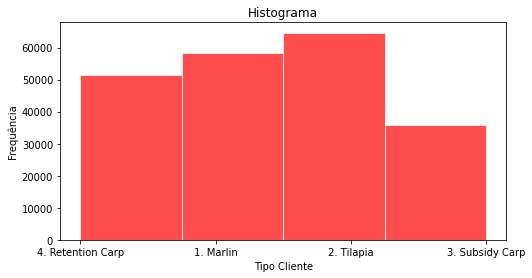

In [44]:
#resultado
fig, ax = plt.subplots(figsize=(8,4))
df_customer_segmentation['marlin_tag'].hist(bins=4, color='red',alpha=0.7,grid=False, edgecolor='white',ax=ax)
plt.title('Histograma')
plt.xlabel('Tipo Cliente')
plt.ylabel('Frequência')

Segundo o histograma acima, podemos observar que, na distribuição de frequência, o cliente do tipo Tilapia, é o que se faz mais presente.

**Gráfico de dispersão**

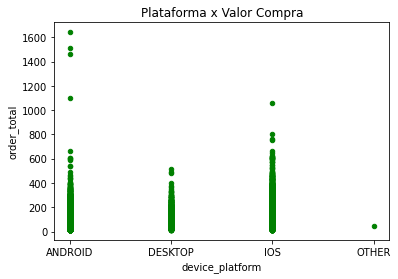

In [45]:
#resultado
df_orders.plot(x='device_platform', y='order_total', 
        kind='scatter', 
        title='Plataforma x Valor Compra', 
        color='green')

De acordo com o resultado do gráfico de dispersão, é possível chegar à conclusão de que os clientes que possuem dispositivos Android são aqueles que efetuam pedidos de maior valor, seguido dos clientes com dispositivos IOS.

**Gráfico de barras**

In [46]:
pd.crosstab(df_customer_segmentation.segmentation_month, df_customer_segmentation.marlin_tag)

marlin_tag,1. Marlin,2. Tilapia,3. Subsidy Carp,4. Retention Carp
segmentation_month,,,,
2019-06-01,5194,7913,6384,10345
2019-07-01,6638,8706,6243,8492
2019-08-01,8126,9445,5532,6976
2019-09-01,9585,10170,4777,5547
2019-10-01,9863,9910,4438,5868
2019-11-01,9574,9543,4267,6743
2019-12-01,9258,8946,4336,7539


In [47]:
tabela = pd.crosstab(df_customer_segmentation.segmentation_month, df_customer_segmentation.marlin_tag)

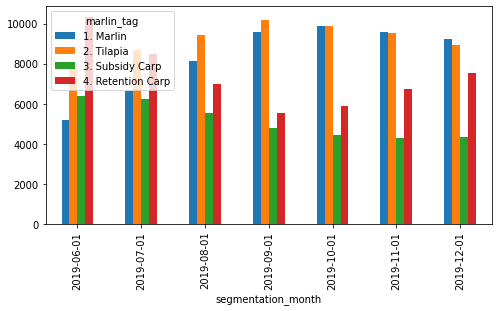

In [49]:
#resultado
fig, ax = plt.subplots(figsize=(8, 4))
tabela.plot(kind='bar', width=0.5, ax=ax)

####Acompanhando o resultado do gráfico acima, podemos observar que,
####distribuído entre os meses, o maior número de clientes segmentados foi do tipo:

####jun/19 - Retention Carp;
####jul/19 - Tilapia;
####ago/19 - mesmo cenário de jul/19;
####set/19 - mesmo cenário de jul/19 e ago/19;
####out/19 - Tilapia, vindo bem próximo, em seguida, Marlin;
####nov/19 - Marlin, vindo bem próximo, em seguida, Tilapia;
####dez/19 - mesmo cenário de nov/19.

**Box-plot**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


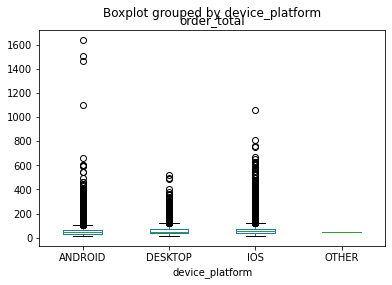

In [50]:
#resultado
df_orders.boxplot(column='order_total', by='device_platform', grid=False)

####Android - maior valor de receita, com maior número de outliers (compras de valores mais representativos);
####IOS - vindo em seguida de Android, com menor número de valores de compras fora do comum.
